In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# add background color to the graph
sns.set(color_codes = True)
#setting default color palette
sns.set_palette(palette = 'magma', n_colors = 8)

In [2]:
df = pd.read_csv(r"C:\Users\bhavi\OneDrive\Desktop\Jupyter Data\CardioGoodFitness.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
# overlook to dataset
def check_data(dataset, head = 5):
    print(30*"#" + "Shape".center(30) + 30*"#")
    print(dataset.shape)
    print("\n" + 30*"#" + "Types".center(30) + 30*"#")
    print(dataset.dtypes)
    print("\n" + 30*"#" + "Types".center(30) + 30*"#")
    print(dataset.describe())
    print("\n" + 30*"#" + "First 5 rows".center(30) + 30*"#")
    print(dataset.head(head))
    print("\n" + 30*"#" + "Last 5 rows".center(30) + 30*"#")
    print(dataset.tail(head))
    print("\n" + 30*"#" + "Missing Values".center(30) + 30*"#")
    print(df.isnull().sum())
    print("\n" + 30*"#" + "Dataset Description".center(30) + 30*"#")
    print(dataset.describe([0,0.10,0.25,0.50,0.75,0.99]).T)


In [4]:
check_data(df)

##############################            Shape             ##############################
(180, 9)

##############################            Types             ##############################
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

##############################            Types             ##############################
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000 

In [5]:
#vAs seen here, our data set consists of 180 observations and 9 features.

# Among the 9 Fetures, Product, Gender and Marital Status are of 'object' datatype And the rest are all 'integer' datatype

# The Features,

# Product: The model no. of the treadmill

# Age: in no of years, of the customer

# Gender: of the customer

# Education: in no. of years, of the customer

# MaritalStatus: of the customer

# Usage: Avg. # times the customer wants to use the treadmill every week

# Fitness: Self rated fitness score of the customer (5 - very fit, 1 - very unfit)

# Income:of the customer


In [6]:
# Feature Extraction
def grab_col_names(dataset, cat_th = 9, car_th = 62):
    
    cat_cols = [col for col in dataset.columns if dataset[col].dtypes == 'O']
    num_but_cat = [col for col in dataset.columns if dataset[col].dtypes != 'O' and dataset[col].nunique() < cat_th]
    cat_but_car = [col for col in dataset.columns if dataset[col].dtypes == 'O' and dataset[col].nunique() > car_th]
    
    #Categorical Columns 
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    #Numerical Columns
    
    num_cols = [col for col in dataset.columns if dataset[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols,num_cols, cat_but_car


In [7]:
grab_col_names(df)

(['Product', 'Gender', 'MaritalStatus', 'Education', 'Usage', 'Fitness'],
 ['Age', 'Income', 'Miles'],
 [])

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [9]:
def cat_summary(dataset, plot = False):
    
    for col_name in cat_cols:
        print(30*"#" + "Unique Observations Of Categorical Data".center(30) + 30*"#")
        print('The Unique Number of '+ col_name + ': '+ str(dataset[col_name].nunique()))
        
        print(30*"#" + "Frequency of Categorical Data".center(30) + 30*"#")
        print(pd.DataFrame({col_name : dataset[col_name].value_counts(), 
                           "Ratio": dataset[col_name].value_counts() / len(dataset)}))
        
        if plot == True:
            rgb_values = sns.color_palette('Set2', 6)
            sns.set_theme(style = 'darkgrid') 
            ax = sns.countplot(x = dataset[col_name], data= dataset, palette= rgb_values)
            
            
            
            for p in ax.patches:
                ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 10)
            plt.show()    

##############################Unique Observations Of Categorical Data##############################
The Unique Number of Product: 3
##############################Frequency of Categorical Data ##############################
       Product     Ratio
TM195       80  0.444444
TM498       60  0.333333
TM798       40  0.222222


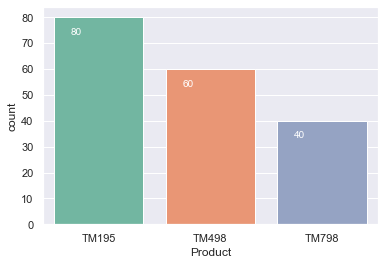

##############################Unique Observations Of Categorical Data##############################
The Unique Number of Gender: 2
##############################Frequency of Categorical Data ##############################
        Gender     Ratio
Male       104  0.577778
Female      76  0.422222


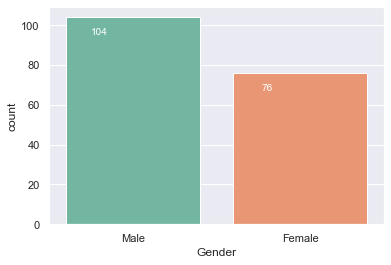

##############################Unique Observations Of Categorical Data##############################
The Unique Number of MaritalStatus: 2
##############################Frequency of Categorical Data ##############################
           MaritalStatus     Ratio
Partnered            107  0.594444
Single                73  0.405556


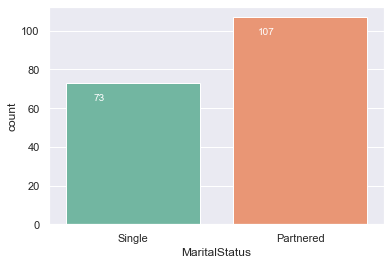

##############################Unique Observations Of Categorical Data##############################
The Unique Number of Education: 8
##############################Frequency of Categorical Data ##############################
    Education     Ratio
16         85  0.472222
14         55  0.305556
18         23  0.127778
15          5  0.027778
13          5  0.027778
12          3  0.016667
21          3  0.016667
20          1  0.005556


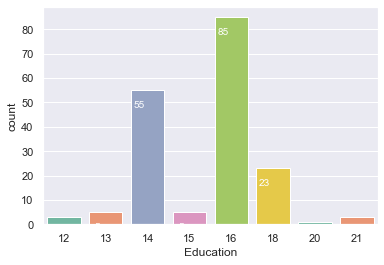

##############################Unique Observations Of Categorical Data##############################
The Unique Number of Usage: 6
##############################Frequency of Categorical Data ##############################
   Usage     Ratio
3     69  0.383333
4     52  0.288889
2     33  0.183333
5     17  0.094444
6      7  0.038889
7      2  0.011111


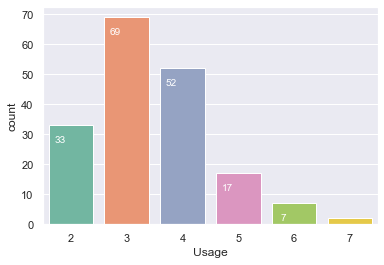

##############################Unique Observations Of Categorical Data##############################
The Unique Number of Fitness: 5
##############################Frequency of Categorical Data ##############################
   Fitness     Ratio
3       97  0.538889
5       31  0.172222
2       26  0.144444
4       24  0.133333
1        2  0.011111


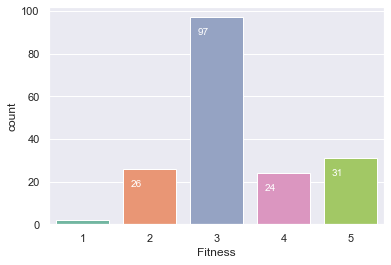

In [10]:
cat_summary(df, plot = True)

Observation :-

When we examine the categorical variables in the data set:

We can see that men do cardio more intensely.

Married members are more likely to do cardio than single members

The education level values of the customers frequently show as 12-18. In addition, it varies up to 21 years, outlier.

When we look at it in general, the frequency of use of treadmill is minimum 2 times a week, 3 times a week mostly, and treadmill is used 4 days a week on average to represent the population. Very few members use the treadmill 6 days a week, and these members appear as contradictory. Data is right skewed.

In the fitness variable, we see the values by which the members evaluate themselves. These values vary between 'unfit'(2) and 'very fit'(5). In addition, there are members who see themselves as "very unfit"(1). Most members rated themselves as 3. Fitness features is right skewed.

Now we can examine the features in the dataset such as age and general income levels of the members.

In [11]:
def num_summary(dataset, plot = False):
    quantiles = [0, 0.10, 0.25, 0.50, 0.75, 0.90, 1.00]
    
    for col_name in num_cols:
        print(30*"#" + "Summary Statistics of "+ col_name +30*"#")
        print(dataset[col_name].describe(quantiles).T)
        
        if plot:
            '''''''''
            sns.histplot(data = dataset, x = col_name)
            plt.xlabel(col_name)
            plt.title('The Distribution of ' + col_name)
            plt.grid(True)
            plt.show(block= True)
        '''''
            plt.figure(figsize = (12,5))    
            plt.subplot(1,2,1)             
            sns.histplot(dataset[col_name])          
            plt.subplot(1,2,2)              
            sns.boxplot(y = dataset[col_name])      
            plt.show()    

##############################Summary Statistics of Age##############################
count    180.000000
mean      28.788889
std        6.943498
min       18.000000
0%        18.000000
10%       22.000000
25%       24.000000
50%       26.000000
75%       33.000000
90%       38.100000
100%      50.000000
max       50.000000
Name: Age, dtype: float64


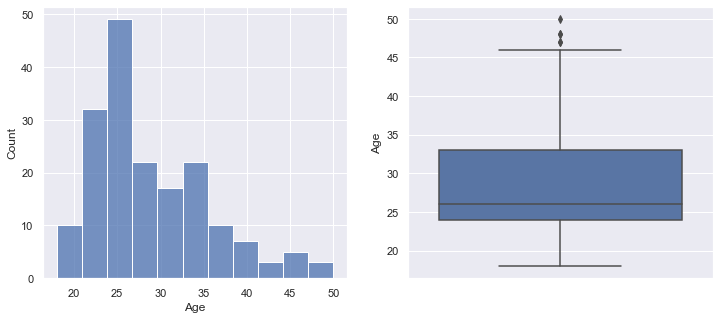

##############################Summary Statistics of Income##############################
count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
0%        29562.000000
10%       35247.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
90%       83416.000000
100%     104581.000000
max      104581.000000
Name: Income, dtype: float64


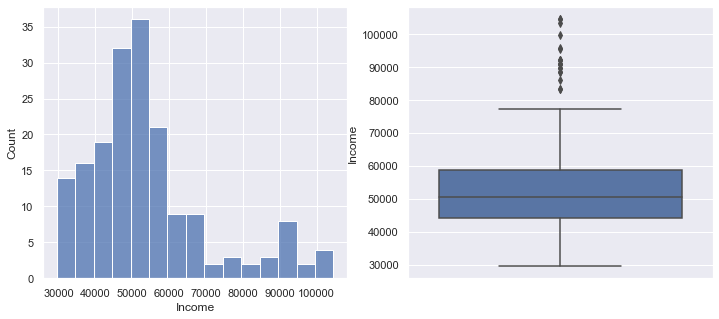

##############################Summary Statistics of Miles##############################
count    180.000000
mean     103.194444
std       51.863605
min       21.000000
0%        21.000000
10%       53.000000
25%       66.000000
50%       94.000000
75%      114.750000
90%      180.000000
100%     360.000000
max      360.000000
Name: Miles, dtype: float64


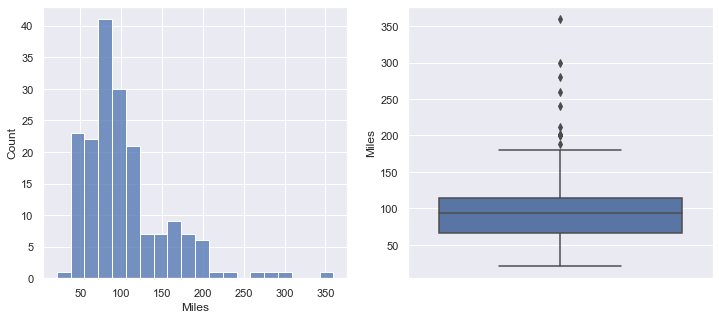

In [12]:
num_summary(df, plot = True)

Observation :- 

The age of the customers is between 18 - 46. At the same time, we see 50-year-old customers as an outlier. But in general, it can be said that our customers consist of young people. Because, we see that the IQR value is between 24-30.Age is a right skewed distribution.

When the annual incomes of the members are considered, it can be seen that the values vary between 30k and 77k. As an outlier, we see a value of 104 k. The overall mean of the data set is between 43 K and 58 K. The data is right skewed.

Now we can examine the relationships between the variables. We will be examining the status of the members in the fitness center by performing some manipulations on the variables.

In [13]:
df_corr = df.corr()   # The correlations of Features between values and assigning the same to the features df_corr
df_corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

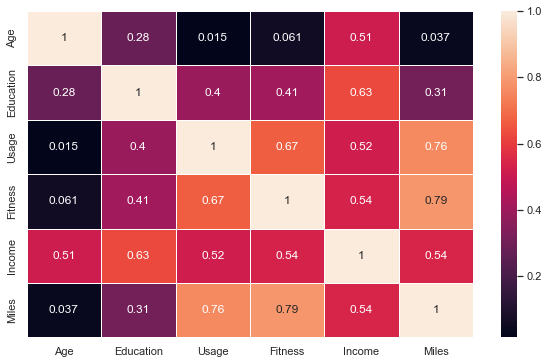

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, linewidths = 0.5, linecolor = 'white')

# Explatory Data Analysis :



Relationships Between Numerical Features


Age & Usage 

<AxesSubplot:xlabel='Age', ylabel='Usage'>

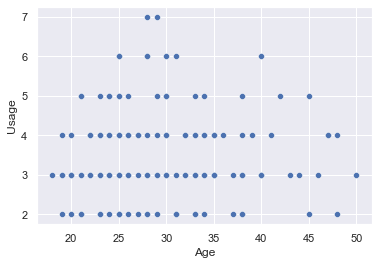

In [15]:
sns.scatterplot(x = 'Age', y = 'Usage', data = df)  


<AxesSubplot:xlabel='Age', ylabel='Usage'>

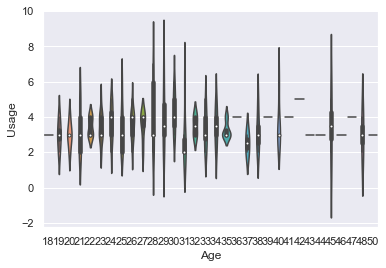

In [16]:
sns.violinplot(x = 'Age', y = 'Usage', data = df)

<AxesSubplot:xlabel='Age', ylabel='Usage'>

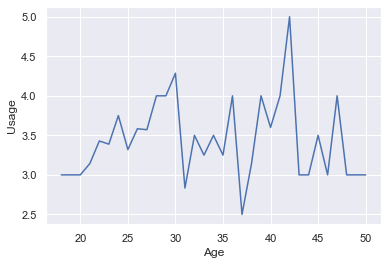

In [17]:
sns.lineplot(x = 'Age', y = 'Usage', data = df, ci = None)

Observation:-

As per graph, the members aged between 40-45 have the highest frequency of use. Towards the end of their 30s, the frequency of exercise of the customers dropped drastically and gradually increased in the following periods.

Customers in their mid-40s use treadmills 3 to 4 days a week.

Customers in their 50s use treadmills regularly 3-4 days a week.

In general, the age of the users, the treadmills do not provide information about their use. There was no effect of age change on the frequency of use.

Ages & Miles

<AxesSubplot:xlabel='Age', ylabel='Miles'>

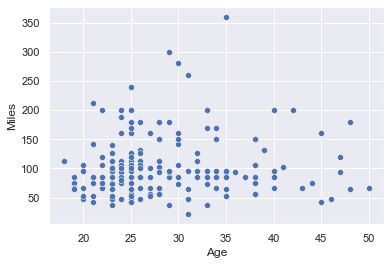

In [18]:
sns.scatterplot(x = 'Age', y = 'Miles', data = df)

<AxesSubplot:xlabel='Age', ylabel='Miles'>

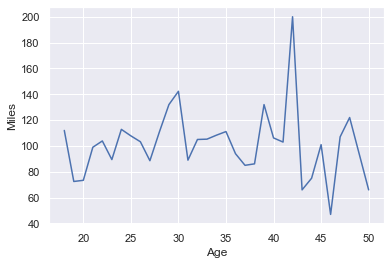

In [19]:
sns.lineplot(x = 'Age', y = 'Miles', data = df, ci = None)

Observation :-

As per graph, it is seen that the users who travel the most are between the ages of 40-42.

When the patterns in the graphic are examined carefully, it is seen that users in their late 20s; We see that users in their late 30s and late 40s present travel data in similar patterns.

Considering the age range of 42 and 47, a serious decrease was observed.

Age Vs fitness

<AxesSubplot:xlabel='Age', ylabel='Fitness'>

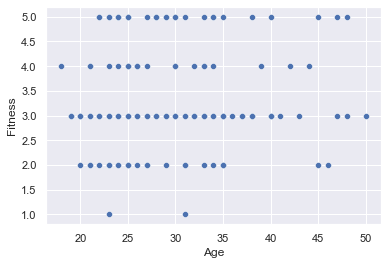

In [20]:
sns.scatterplot(x = 'Age' , y = 'Fitness' , data=df)

<AxesSubplot:xlabel='Age', ylabel='Fitness'>

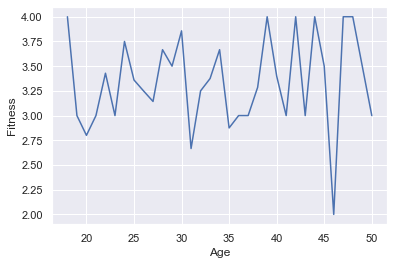

In [21]:
sns.lineplot(x = 'Age' , y = 'Fitness' , data=df, ci=None)

Observation:-

As per graph, members aged 45-46 have the lowest fitness level compared to the general population.

Members between the ages of 47 and 48 are also users with the highest fitness levels.

Usage & Miles:

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

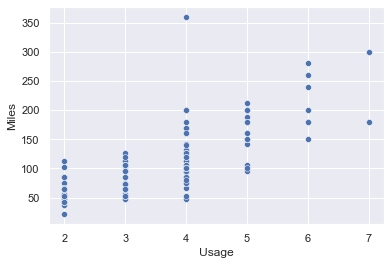

In [22]:
sns.scatterplot(x = 'Usage', y='Miles', data=df)

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

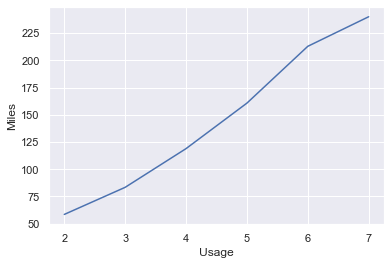

In [23]:
sns.lineplot(x ='Usage', y='Miles',data=df, ci=None)

Usage & Fitness

<AxesSubplot:xlabel='Usage', ylabel='Fitness'>

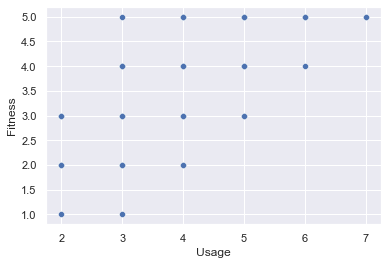

In [24]:
sns.scatterplot(x = 'Usage', y = 'Fitness', data = df)

<AxesSubplot:xlabel='Usage', ylabel='Fitness'>

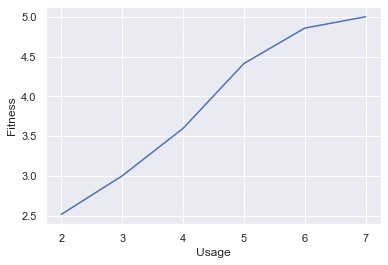

In [25]:
sns.lineplot(x = 'Usage', y = 'Fitness', data = df, ci = None)

Fitness & Miles

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

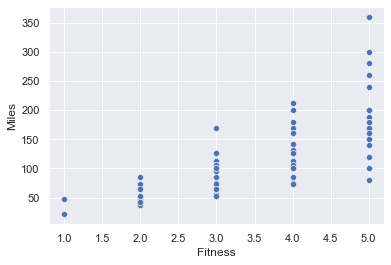

In [26]:
sns.scatterplot(x = 'Fitness', y = 'Miles', data = df)

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

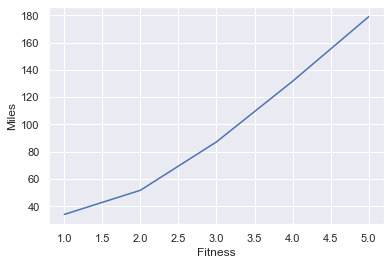

In [27]:
sns.lineplot(x = 'Fitness', y = 'Miles', data = df, ci = None)

Strong Correlation between Fitness & Miles

Income & Miles

<AxesSubplot:xlabel='Income', ylabel='Miles'>

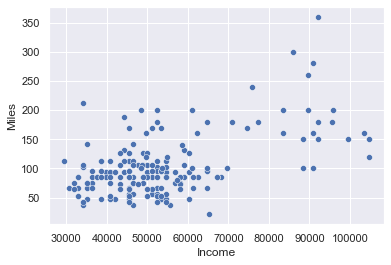

In [28]:
sns.scatterplot(x = 'Income', y = 'Miles', data = df)

<AxesSubplot:xlabel='Income', ylabel='Miles'>

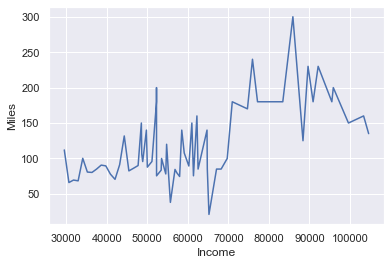

In [29]:
sns.lineplot(x = 'Income', y = 'Miles', data = df, ci = None)

Observation :-

The running values of the users having annual average income is < 70,000 are considered, it is observed that they are between 120 and 300 miles.

The running values of the users having annual average income is >= 70,000, the miles values change between 150-200.

# Relationships Between Categorical Features

Gender Vs Marital Status

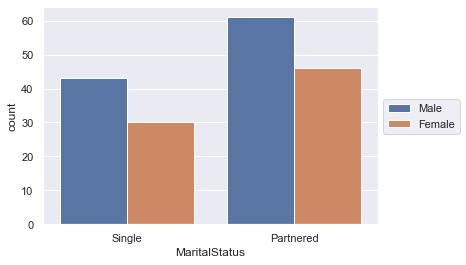

In [30]:
sns.countplot(x = 'MaritalStatus', data = df, hue = 'Gender')
plt.legend(bbox_to_anchor = (1,0.6))

Observation :
Male customers regarding marital Status

# Relationships Between Categorical Features and Numerical Features 

<AxesSubplot:xlabel='MaritalStatus', ylabel='Usage'>

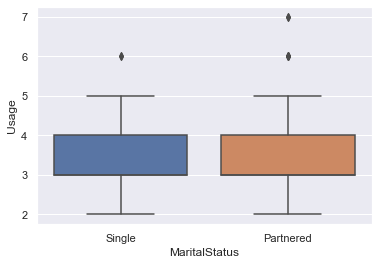

In [31]:
sns.boxplot(x = 'MaritalStatus', y = 'Usage', data = df)

Observation :-

After examining the frequency usage of married and single users , it reflects a similar pattern to each other and the Interquartile range value for both is 3-4 times a week.

After examining the the contradictory values for both the categories, Married members show a frequency of use up to 7 times a week, and single members value remains at a maximum of 6 for single users.

# Multivariate Data Analysis

<AxesSubplot:xlabel='Miles', ylabel='Income'>

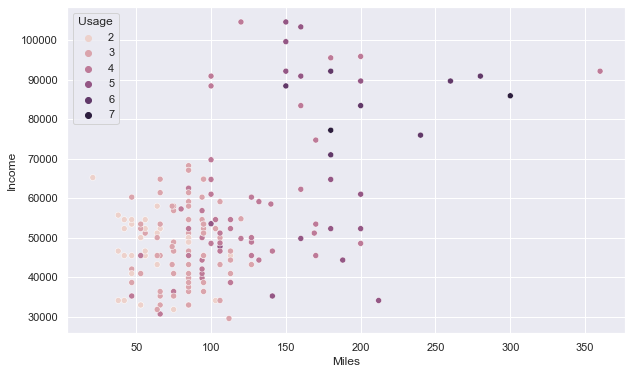

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'Miles' , y='Income', hue='Usage', data=df)
#plt.legend(bbox_to_anchor =(1,1))

Observation :-

Users with an annual income of > 70,000 deliver <= 200 miles per week.

Users with a higher average annual income, on the other hand, have a Miles value between 100 and 360.